# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the images/decision_trees folder (if it doesn't already exist), and define the save_fig() function which is used through this notebook to save the figures in high-res for the book:

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read Dataset

In [3]:
df = pd.read_csv('iris.csv')
print(df.shape)
df.head()


(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('variety', axis = 1)
y = df['variety']



# Some Visualizations

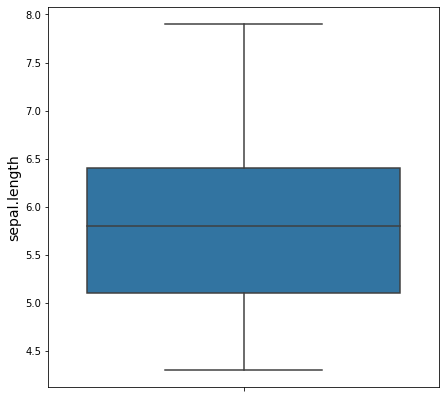

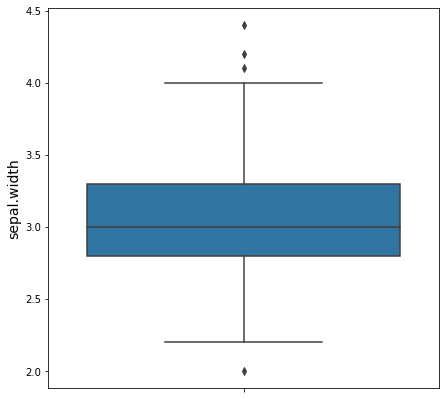

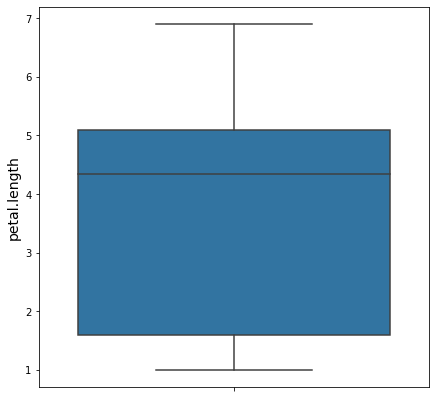

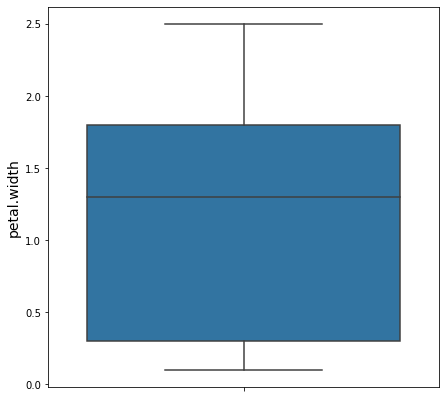

In [6]:
for features in X.columns:
    plt.figure(figsize = (7,7))
    sns.boxplot(y = X[features])

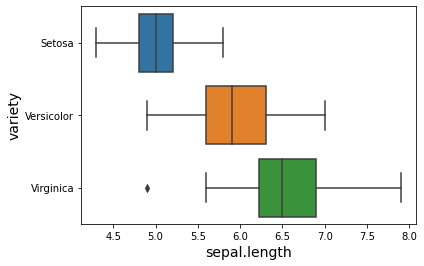

In [7]:
sns.boxplot(data = df, x = 'sepal.length', y = 'variety');

In [8]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

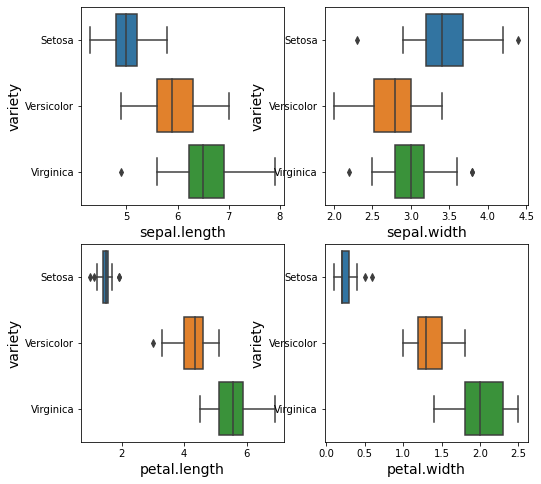

In [9]:
featuresList = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
plt.figure(figsize = (8,8))
subplot_no = 221
for f in featuresList:
    plt.subplot(subplot_no)
    sns.boxplot(data = df, x = f, y = 'variety')
    subplot_no = subplot_no + 1

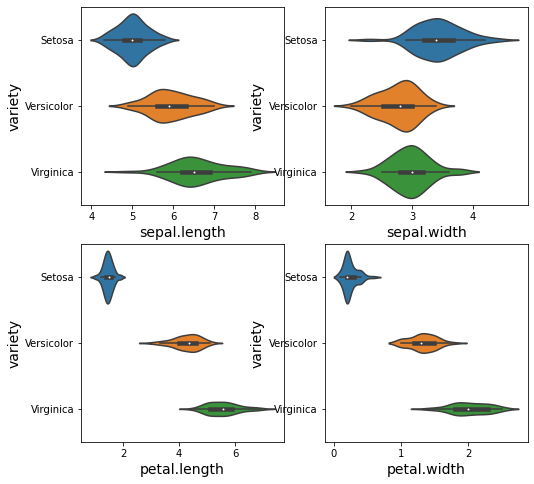

In [10]:
plt.figure(figsize = (8,8))
subplot_no = 221
for f in featuresList:
    plt.subplot(subplot_no)
    sns.violinplot(data = df, x = f, y = 'variety')
    subplot_no = subplot_no + 1

# Training and Testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32, stratify = y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [12]:
y_train.value_counts()

Setosa        40
Versicolor    40
Virginica     40
Name: variety, dtype: int64

In [13]:
y_test.value_counts()

Virginica     10
Setosa        10
Versicolor    10
Name: variety, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

Train Accuracy:  0.9583333333333334
Test Accuracy:  0.9666666666666667


In [15]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  
        feature_names=X.columns,
        class_names=y.unique(),
        rounded=True,
        filled=True
    )

# to visualize go to
# https://dreampuf.github.io/GraphvizOnline/

In [16]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        val_errors.append(accuracy_score(y_val, y_val_predict))

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("Accuracy", fontsize=14)              # not shown

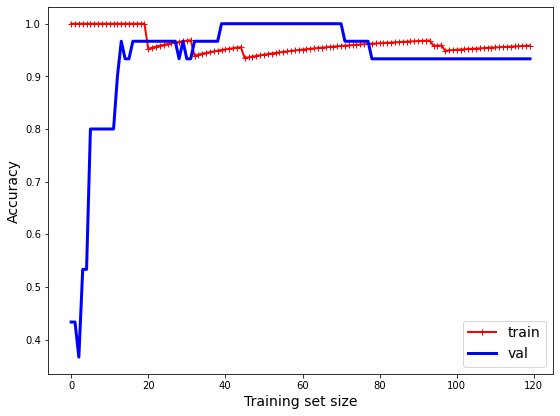

In [17]:
plt.figure(figsize = (8,6))
plot_learning_curves(tree_clf, X, y)
save_fig("Learning Curve for the iris dataset")

# Regression

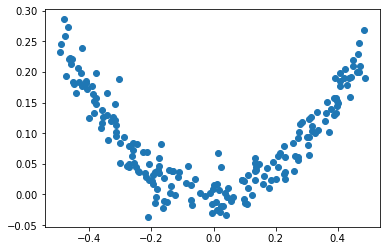

In [18]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

plt.scatter(X_quad, y_quad);

In [19]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [20]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)